In [334]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# NAME: BARANOV MAXIM
# GROUP: IT3-2106
# DATASET FROM KAGGLE: WineQT.csv

In [335]:
wine = pd.read_csv('WineQT.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [336]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [337]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### The purpose of the study is to determine whether the specific chemical characteristics of the wine affect its quality. The main question of the study is: Can certain chemical properties of wine (for example, alcohol level, acidity) be statistically significant predictors of its quality?

## Hypothesis:
## Null hypothesis (H0): The alcohol level does not affect the quality of the wine (or the selected characteristic does not affect the quality).
## Alternative hypothesis (H1): Alcohol level affects the quality of wine (or the selected characteristic affects the quality).

#### fixed acidity: фиксированная кислотность.
#### volatile acidity: летучая кислотность.
#### citric acid: содержание лимонной кислоты.
#### residual sugar: остаточный сахар.
#### chlorides: содержание хлоридов.
#### free sulfur dioxide: свободный диоксид серы.
#### total sulfur dioxide: общий диоксид серы.
#### density: плотность вина.
#### pH: уровень кислотности.
#### sulphates: содержание сульфатов.
#### alcohol: содержание алкоголя.
#### quality: оценка качества (целевой признак).

# Correlation matrix
## Let's focus on the signs that show the strongest correlation with quality.

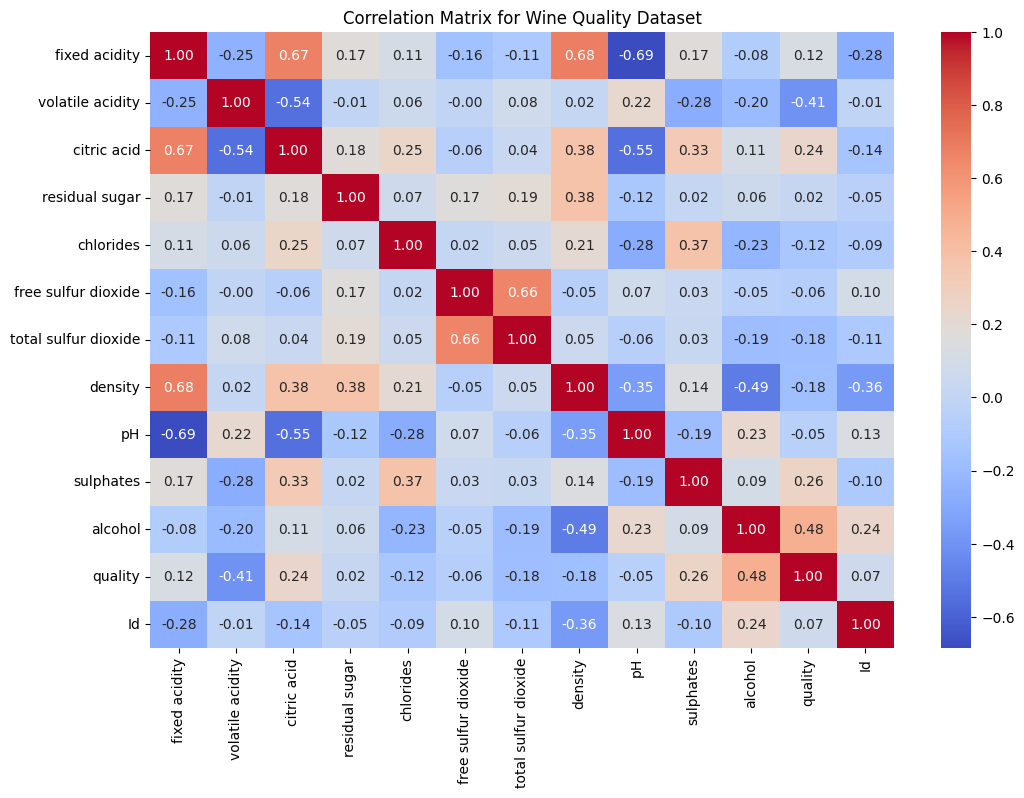

In [338]:
plt.figure(figsize=(12, 8))
correlation_matrix = wine.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Wine Quality Dataset')
plt.show()

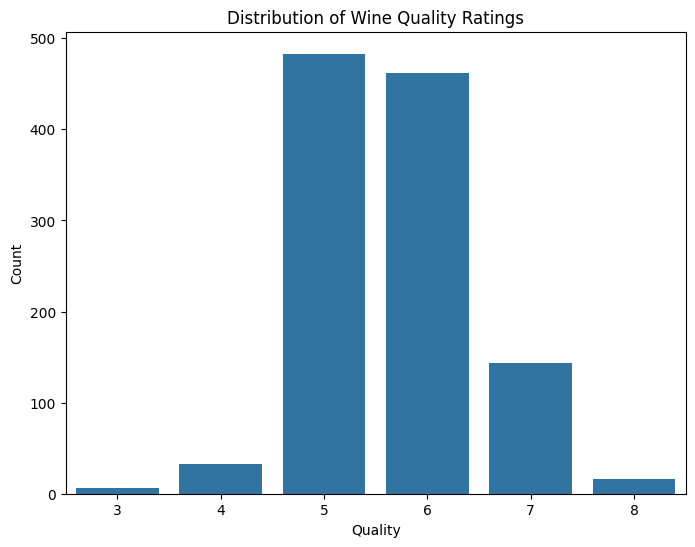

In [339]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

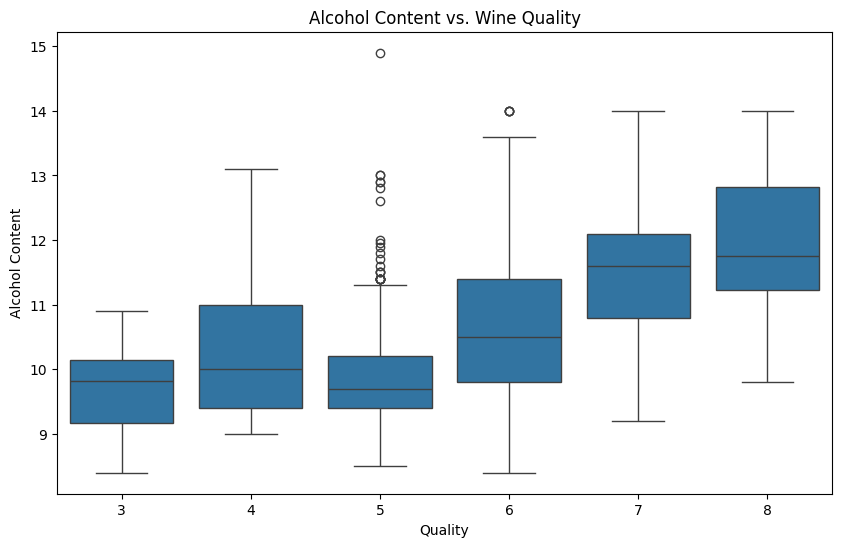

In [340]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

### The distribution of quality ratings indicates that most ratings are in the range of 5 to 7, indicating a potential data imbalance.
Это указывает на то, что вино либо редко получает очень низкие, либо очень высокие оценки.

# Data preprocessing

In [341]:
X = wine[['residual sugar']]  # Features
y = wine['quality'] # Target

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [343]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=13)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [344]:
print(f"Количество данных до undersampling: \n{y_train.value_counts()}")
print(f"Количество данных после undersampling: \n{y_train_under.value_counts()}")

Количество данных до undersampling: 
quality
5    385
6    372
7    115
4     22
8     15
3      5
Name: count, dtype: int64
Количество данных после undersampling: 
quality
6    372
7    115
4     22
8     15
3      5
5      5
Name: count, dtype: int64


In [345]:
scaler = StandardScaler()
X_train_under_scaled = scaler.fit_transform(X_train_under)
X_test_scaled = scaler.transform(X_test)

In [346]:
logreg = LogisticRegression(max_iter=1000, random_state=13)

'''
    Logistic Regression:
    ~> Probability of belonging of object to one of two classes, depending on the values of its features.
    ~> Using sigmoid function = 1 / (1 + e ^ (-z))
    where z = b_0 + b_1 * x_1 + ... + b_n * x_n

    Formula:
    P(y = 1|x) = 1 / (1 + e ^ (-z))

    P(y = 1|x) > 0.5 -> 1 class, else 0 class

    Function that shows how model can predict: (Log-likelihood)
    L(b) = SUM (^(m) v(i=1)) ( y_i * log(P(y_i|x_i)) + (1 - y_i) * log(1 - P(y_i|x_i)) )

    m -> mount of learning object

'''

logreg.fit(X_train_under_scaled, y_train_under)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        98
           6       0.39      0.99      0.56        90
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00         1

    accuracy                           0.39       229
   macro avg       0.07      0.16      0.09       229
weighted avg       0.15      0.39      0.22       229



C:\Users\santa\PycharmProjects\EploratoryDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\santa\PycharmProjects\EploratoryDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\santa\PycharmProjects\EploratoryDataAnalysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

##### Accuracy is 0.44 that means LogisticRegression is non-compatible fot this problem

quality_label
medium    945
high      159
low        39
Name: count, dtype: int64


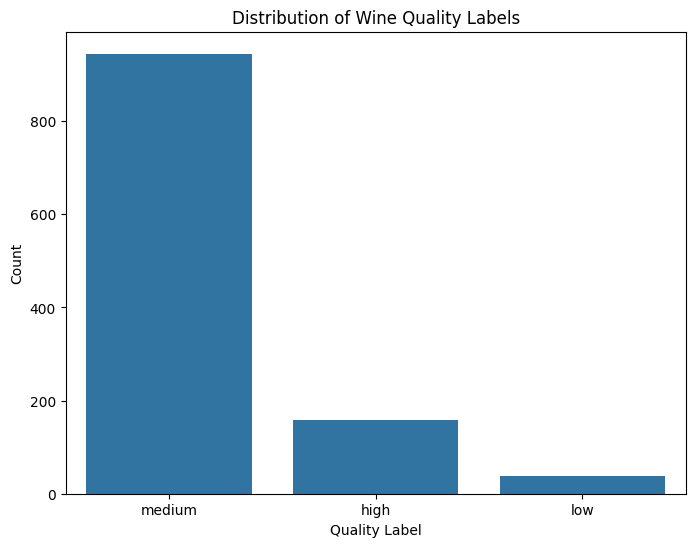

In [347]:
## Binning (Переопределение классов)
wine['quality_label'] = wine['quality'].apply(lambda x: 'low' if x <= 4 else ('medium' if x <= 6 else 'high'))

print(wine['quality_label'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='quality_label', data=wine)
plt.title('Distribution of Wine Quality Labels')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.show()

## Class groups are now less detailed but we need do some weighting to optimizing learning
## So do some preprocessing

No null values

In [348]:
wine = wine.drop('quality', axis=1) ## kill this table

In [349]:
# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine.drop('quality_label', axis=1))

wine_scaled = pd.DataFrame(scaled_features, columns=wine.columns[:-1])
wine_scaled['quality_label'] = wine['quality_label']

In [350]:
# Encoding
label_encoder = LabelEncoder()
wine_scaled['quality_label'] = label_encoder.fit_transform(wine_scaled['quality_label'])

In [351]:
wine_scaled['quality_label'].unique(), wine['quality_label'].unique(),

(array([2, 0, 1]), array(['medium', 'high', 'low'], dtype=object))

In [352]:
X = wine_scaled.drop('quality_label', axis=1)
y = wine_scaled['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Find p-value, t-value, explain meaning of each value.
### And in other to our model will be more truly predictable we need choose parameter weighted class in our logistic

## Logistic Regression

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(class_weight='balanced', max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [354]:
y_pred = logreg.predict(X_test)

comparison = pd.DataFrame({
    'Real Value': y_test,
    'Predicted Value': y_pred
})

comparison

,Real Value,Predicted Value
540,2,1
762,2,2
505,2,0
609,2,0
818,2,0
...,...,...
544,2,2
642,2,2
295,2,1
471,2,2


In [355]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.76      0.54        33
           1       0.13      0.75      0.22        12
           2       0.92      0.49      0.64       184

    accuracy                           0.55       229
   macro avg       0.49      0.67      0.47       229
weighted avg       0.81      0.55      0.61       229

Confusion Matrix:


array([[25,  3,  5],
       [ 0,  9,  3],
       [35, 58, 91]], dtype=int64)

In [356]:
from imblearn.over_sampling import SMOTE

#### So it's not good result, maybe using oversampling with synthetic data help

In [357]:
smote = SMOTE(random_state=13)

# oversampling only to train data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

logreg_sm = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = logreg_sm.predict(X_test)

print(classification_report(y_test, y_pred_sm))
confusion_matrix(y_test, y_pred_sm)

              precision    recall  f1-score   support

           0       0.43      0.73      0.54        33
           1       0.12      0.67      0.21        12
           2       0.91      0.53      0.67       184

    accuracy                           0.56       229
   macro avg       0.49      0.64      0.47       229
weighted avg       0.80      0.56      0.62       229



array([[24,  2,  7],
       [ 1,  8,  3],
       [31, 56, 97]], dtype=int64)

## Random Forest

In [358]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=13, n_estimators=1000)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix for Random Forest:")
confusion_matrix(y_test, y_pred_rf)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.48      0.62        33
           1       0.00      0.00      0.00        12
           2       0.86      0.98      0.92       184

    accuracy                           0.86       229
   macro avg       0.57      0.49      0.51       229
weighted avg       0.81      0.86      0.83       229

Confusion Matrix for Random Forest:


array([[ 16,   0,  17],
       [  0,   0,  12],
       [  3,   0, 181]], dtype=int64)

In [359]:
smote = SMOTE(random_state=14)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

rf_model_smote = RandomForestClassifier(class_weight='balanced', random_state=13, n_estimators=100)
rf_model_smote.fit(X_train_sm, y_train_sm)

y_pred_rf_smote = rf_model_smote.predict(X_test)
print(classification_report(y_test, y_pred_rf_smote, zero_division=0))
confusion_matrix(y_test, y_pred_rf_smote)

              precision    recall  f1-score   support

           0       0.62      0.70      0.66        33
           1       0.25      0.25      0.25        12
           2       0.90      0.88      0.89       184

    accuracy                           0.82       229
   macro avg       0.59      0.61      0.60       229
weighted avg       0.83      0.82      0.82       229



array([[ 23,   1,   9],
       [  0,   3,   9],
       [ 14,   8, 162]], dtype=int64)

# Third Try

In [360]:
df = pd.read_csv('WineQT.csv')
df = df.drop(columns=['Id'])

In [361]:
X = df.drop(columns=['quality'])
y = df['quality']

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [363]:
scaler = StandardScaler()
'''
    z = x - mean / std
'''
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [364]:
logreg_multiclass = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg_multiclass.fit(X_train_scaled, y_train)

'''
    L-BFGS -> Limited-memory Broyden–Fletcher–Goldfarb–Shanno
    ~ Ограничение памяти (для работы с большим кол-вом данных
'''

y_pred = logreg_multiclass.predict(X_test_scaled)

print("Классификационный отчет:\n", classification_report(y_test, y_pred, zero_division=0))

Классификационный отчет:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        12
           5       0.68      0.76      0.71        94
           6       0.55      0.63      0.59        90
           7       0.42      0.27      0.33        30
           8       0.00      0.00      0.00         3

    accuracy                           0.59       229
   macro avg       0.27      0.28      0.27       229
weighted avg       0.55      0.59      0.57       229



In [365]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=13)
decision_tree.fit(X_train_scaled, y_train)

random_forest = RandomForestClassifier(random_state=13, n_estimators=100)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=13)

In [366]:
y_pred_logreg = logreg_multiclass.predict(X_test_scaled)
y_pred_tree = decision_tree.predict(X_test_scaled)
y_pred_forest = random_forest.predict(X_test_scaled)

In [367]:
print("Логистическая регрессия:\n", classification_report(y_test, y_pred_logreg, zero_division=0))
print("Decision Tree:\n", classification_report(y_test, y_pred_tree, zero_division=0))
print("Random Forest:\n", classification_report(y_test, y_pred_forest, zero_division=0))

Логистическая регрессия:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        12
           5       0.68      0.76      0.71        94
           6       0.55      0.63      0.59        90
           7       0.42      0.27      0.33        30
           8       0.00      0.00      0.00         3

    accuracy                           0.59       229
   macro avg       0.27      0.28      0.27       229
weighted avg       0.55      0.59      0.57       229

Decision Tree:
               precision    recall  f1-score   support

           4       0.40      0.17      0.24        12
           5       0.67      0.66      0.67        94
           6       0.58      0.63      0.60        90
           7       0.53      0.53      0.53        30
           8       0.00      0.00      0.00         3

    accuracy                           0.60       229
   macro avg       0.44      0.40  

Вывод:
Random Forest показал наилучшие результаты по точности и f1-score, особенно для классов 5, 6 и 7. Это делает его лучшим выбором среди трех моделей.
Логистическая регрессия показала средние результаты и страдает от плохих предсказаний редких классов.
Decision Tree находится между логистической регрессией и Random Forest, но также имеет проблемы с редкими классами и немного хуже по точности.

Conclusion:
Random Forest showed the best results in accuracy and f1-score, especially for grades 5, 6 and 7. This makes it the best choice among the three models.
Logistic regression has shown average results and suffers from poor predictions of rare classes.
The Decision Tree is between logistic regression and Random Forest, but also has problems with rare classes and is slightly worse in accuracy.

In [368]:
import numpy as np

rf = RandomForestClassifier(random_state=13, n_estimators=100)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_

standard_errors = np.std(X_train_scaled, axis=0) / np.sqrt(len(X_train_scaled))

T-value: beta / SE(beta)
beta -> coefficient of model (features weights)
SE(beta) -> standard error for beta

In [369]:
t_values = importances / standard_errors

p_values = [2 * (1 - stats.t.cdf(np.abs(t_val), df=len(X_train_scaled)-1)) for t_val in t_values]

for idx, col in enumerate(X.columns):
    print(f"Признак: {col} - t-value: {t_values[idx]:.4f}, p-value: {p_values[idx]:.4f}")

Признак: fixed acidity - t-value: 2.2361, p-value: 0.0256
Признак: volatile acidity - t-value: 3.1593, p-value: 0.0016
Признак: citric acid - t-value: 2.2306, p-value: 0.0260
Признак: residual sugar - t-value: 1.9957, p-value: 0.0463
Признак: chlorides - t-value: 2.4283, p-value: 0.0154
Признак: free sulfur dioxide - t-value: 1.9685, p-value: 0.0493
Признак: total sulfur dioxide - t-value: 3.0394, p-value: 0.0024
Признак: density - t-value: 2.7149, p-value: 0.0068
Признак: pH - t-value: 2.3246, p-value: 0.0203
Признак: sulphates - t-value: 3.6835, p-value: 0.0002
Признак: alcohol - t-value: 4.4515, p-value: 0.0000


In [370]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(random_state=13, n_estimators=100)
rf.fit(X_train_scaled, y_train)

result = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=13)

for i in range(X.shape[1]):
    print(f"Признак: {X.columns[i]} - Importance: {result.importances_mean[i]:.4f}, "
          f"p-value: {np.mean(result.importances[i] == 0):.4f}")

Признак: fixed acidity - Importance: 0.0092, p-value: 0.1000
Признак: volatile acidity - Importance: 0.0559, p-value: 0.0000
Признак: citric acid - Importance: 0.0214, p-value: 0.1000
Признак: residual sugar - Importance: 0.0004, p-value: 0.3000
Признак: chlorides - Importance: 0.0109, p-value: 0.0000
Признак: free sulfur dioxide - Importance: 0.0122, p-value: 0.1000
Признак: total sulfur dioxide - Importance: 0.0463, p-value: 0.0000
Признак: density - Importance: 0.0144, p-value: 0.2000
Признак: pH - Importance: 0.0057, p-value: 0.0000
Признак: sulphates - Importance: 0.0524, p-value: 0.0000
Признак: alcohol - Importance: 0.1223, p-value: 0.0000


## alcohol:
## Importance: 0.1293
## p-value: 0.0000 (меньше 0.05)
## Вывод: Признак "alcohol" является самым значимым для модели.